#**Intodução ao GeoPandas**

In [1]:
# Instalando o pyodbc e geopandas no Google Colab, para ambientes locais basta o comando pip install pyodbc e pip install geopandas
!apt install unixodbc-dev
!pip install pyodbc
!pip install geopandas
!pip install shapely
!pip install contextily

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  unixodbc-dev
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 217 kB of archives.
After this operation, 1,779 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 unixodbc-dev amd64 2.3.4-1.1ubuntu3 [217 kB]
Fetched 217 kB in 1s (405 kB/s)
Selecting previously unselected package unixodbc-dev:amd64.
(Reading database ... 144556 files and directories currently installed.)
Preparing to unpack .../unixodbc-dev_2.3.4-1.1ubuntu3_amd64.deb ...
Unpacking unixodbc-dev:amd64 (2.3.4-1.1ubuntu3) ...
Setting up unixodbc-dev:amd64 (2.3.4-1.1ubuntu3) ...
     |████████████████████████████████| 276kB 2.8MB/s 
  Created wheel for pyodbc: filename=pyodbc-4.0

In [2]:
#Instala driver do SQL SERVER para Ubuntu diretamente do site da Microsoft
%%sh
curl https://packages.microsoft.com/keys/microsoft.asc | apt-key add -
curl https://packages.microsoft.com/config/ubuntu/16.04/prod.list > /etc/apt/sources.list.d/mssql-release.list
sudo apt-get update
sudo ACCEPT_EULA=Y apt-get -q -y install msodbcsql17

OK
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://packages.microsoft.com/ubuntu/16.04/prod xenial InRelease [4,003 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://packages.microsoft.com/ubuntu/16.04/prod xenial/main amd64 Packages [170 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [890 kB]
Get:12 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0Warning: apt-key output should not be parsed (stdout is not a terminal)
100   983  100   983    0     0   9101      0 --:--:-- --:--:-- --:--:--  9101
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    79  100    79    0     0    814      0 --:--:-- --:--:-- --:--:--   814
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 6.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling

In [3]:
import pyodbc 
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
from shapely.wkt import loads
import contextily

In [4]:
print(pyodbc.drivers())

['ODBC Driver 17 for SQL Server']


Conectando ao banco de dados

In [5]:
servidor = 'geofiapserver.database.windows.net'
bancodedados = 'GeoFiap'
usuario = 'geofiapuser'
password = 'aluno@123'
try:
    conexao = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER=' + 
                              servidor+';DATABASE='+bancodedados+';UID='+usuario+';PWD=' + password)
    print("\n"*2)
    print("Conectado com sucesso")
    
except Exception as e:
    print("Erro ao conectar ao SQL Server: ", e)




Conectado com sucesso


Realizando a leitura da Tabela Cidade do Banco de Dados GeoFiap para seus respectivos Dataframes Pandas

In [19]:
sql = "Select Nome, CidadeGeo.STAsText() as WKTGeoCidade from Cidades "
dfCidades = pd.read_sql(sql,conexao)
dfCidades.head()

,Nome,WKTGeoCidade
0,São Caetano do Sul,"MULTIPOLYGON (((-46.5834093 -23.6410991, -46.5..."
1,São Paulo,"MULTIPOLYGON (((-46.8233162 -23.4223871, -46.8..."
2,Santo André,"POLYGON ((-46.32 -23.802, -46.3020001 -23.7870..."
3,São Bernardo do Campo,"POLYGON ((-46.589 -23.9620001, -46.58 -23.9550..."
4,Diadema,"MULTIPOLYGON (((-46.6524292 -23.7309214, -46.6..."


In [20]:
#Obtém o WKT da cidades
dfCidades["GeoCidadeGeom"] = dfCidades["WKTGeoCidade"].apply(loads)

#cria o GeoDataFrame
geoCidades = geopandas.GeoDataFrame(dfCidades, geometry='GeoCidadeGeom', crs= 'EPSG:4326' )
geoCidades.head()

,Nome,WKTGeoCidade,GeoCidadeGeom
0,São Caetano do Sul,"MULTIPOLYGON (((-46.5834093 -23.6410991, -46.5...","MULTIPOLYGON (((-46.58341 -23.64110, -46.58287..."
1,São Paulo,"MULTIPOLYGON (((-46.8233162 -23.4223871, -46.8...","MULTIPOLYGON (((-46.82332 -23.42239, -46.82310..."
2,Santo André,"POLYGON ((-46.32 -23.802, -46.3020001 -23.7870...","POLYGON ((-46.32000 -23.80200, -46.30200 -23.7..."
3,São Bernardo do Campo,"POLYGON ((-46.589 -23.9620001, -46.58 -23.9550...","POLYGON ((-46.58900 -23.96200, -46.58000 -23.9..."
4,Diadema,"MULTIPOLYGON (((-46.6524292 -23.7309214, -46.6...","MULTIPOLYGON (((-46.65243 -23.73092, -46.64742..."


In [21]:
dfCidades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Nome           6 non-null      object  
 1   WKTGeoCidade   6 non-null      object  
 2   GeoCidadeGeom  6 non-null      geometry
dtypes: geometry(1), object(2)
memory usage: 272.0+ bytes


In [22]:
print(geoCidades.crs)

EPSG:4326


Realizando a Plotagem das Cidades

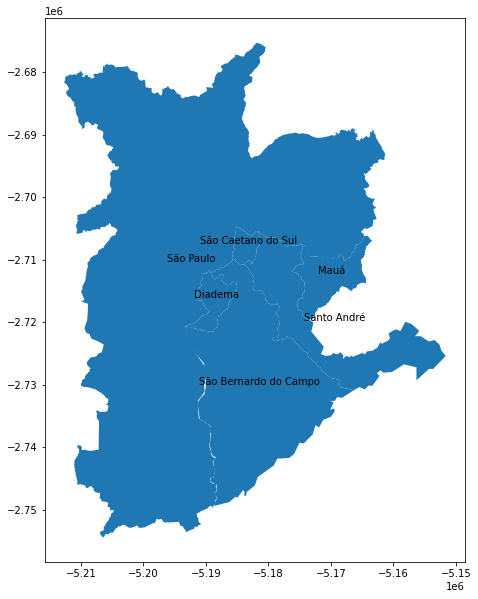

In [38]:
#Faz a plotagem do GeoDataFrame
ax = geoCidades.plot(figsize=(20, 10) )

for centroid, label in zip(geoCidades.geometry.centroid , geoCidades.Nome):    
    ax.annotate(label, xy=centroid.coords[0], xytext=(3, 3), textcoords="offset points",  ha='center')

## Exercício 1 - Geopandas
### Faça uma consulta na tabela Checkin e faça a plotagem dos pontos assim como feito na tabela Cidades, Exibindo o IDCheckin de cada ponto:

Coloque o código da Consulta:

In [40]:
sql = " Select IdCheckin As Id , PontoGeo.STAsText() as WKTGeoCheckin from Checkin "
dfCheckin = pd.read_sql(sql,conexao)
dfCheckin.head()

,Id,WKTGeoCheckin
0,2,POINT (-46.536415314446785 -23.655191690939045)
1,3,POINT (-46.536323311478263 -23.655185405021943)
2,50,POINT (-46.609905046581765 -23.58336715832996)
3,51,POINT (-46.609999899555049 -23.584758335271406)
4,52,POINT (-46.608893281533447 -23.584157599773963)


Coloque aqui o código da conversão do WKT e criação do GeoPandas Dataframe, Dê o nome de geoCheckin ao objeto:

In [41]:
#Coloque aqui o código da conversão do WKT e plotagem dos pontos:

#Obtém o WKT da cidades
dfCheckin["GeoCheckinGeom"] = dfCheckin["WKTGeoCheckin"].apply(loads)

#cria o GeoDataFrame
geoCheckin = geopandas.GeoDataFrame(dfCheckin, geometry='GeoCheckinGeom', crs= 'EPSG:4326' )
geoCheckin.head()

,Id,WKTGeoCheckin,GeoCheckinGeom
0,2,POINT (-46.536415314446785 -23.655191690939045),POINT (-46.53642 -23.65519)
1,3,POINT (-46.536323311478263 -23.655185405021943),POINT (-46.53632 -23.65519)
2,50,POINT (-46.609905046581765 -23.58336715832996),POINT (-46.60991 -23.58337)
3,51,POINT (-46.609999899555049 -23.584758335271406),POINT (-46.61000 -23.58476)
4,52,POINT (-46.608893281533447 -23.584157599773963),POINT (-46.60889 -23.58416)


 Coloque aqui a plotagem dos pontos:

In [42]:
geoCheckin = geoCheckin.to_crs(epsg=3857)
ax = geoCheckin.plot(figsize=(40, 20) )

for centroid, label in zip(geoCheckin.geometry.centroid , geoCheckin.Id):    
    ax.annotate(label, xy=centroid.coords[0], xytext=(3, 3), textcoords="offset points",  ha='center')

contextily.add_basemap(ax)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Plotando as Cidades e os Checkin ao mesmo tempo:

In [43]:
geoCidades = geoCidades.to_crs(epsg=3857)
ax = geoCidades.plot(figsize=(40, 20), edgecolor='black', alpha= 0.5)
ax = geoCheckin.plot(ax=ax , color = 'red')
contextily.add_basemap(ax)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Exercício 2 - Clusterizando dados de Latitude e Longitude

Faça a clusterização dos dados da tabela Checkin (utilizando apenas as colunas Latitude e Longitude do tipo geometry) utilizando Agglomerative Clustering, Kmeans, DBScan ou SOM. Faça o plot dos pontos da tabela checkin colocando cada cluster em uma cor distinta:

In [ ]:
#obtendo a Latitude e Longitude do pontos de um GeoPandas Dataframe
print(geoCheckin.IDCheckin[0], geoCheckin.geometry[0].x, geoCheckin.geometry[0].y)

2 -5180410.056148514 -2711447.652242739
